# Tutorial (basic)

In [20]:
import numpy as np
import pandas as pd
from pytmle import PyTMLE

In [21]:
target_times = [5.0, 10.0, 15.0, 20.0, 25.0]
np.random.seed(42)

Load the Hodgkin's Disease datase (adapted for Python from `rfsrc`):

In [22]:
df = pd.read_csv("hodgkins_disease.csv", index_col=0)
df

,female,extranod,stage2,medwidsi_S,medwidsi_N,chemo,time,status
age,,,,,,,,
64.00,1,0,0,0,1,0,3.1,2
63.00,0,0,0,0,1,0,15.9,2
17.00,0,0,1,0,1,0,0.9,1
63.00,0,0,1,0,1,0,13.1,2
21.00,0,0,1,0,0,0,35.9,0
...,...,...,...,...,...,...,...,...
23.24,1,0,1,1,0,0,6.2,0
43.00,1,1,1,0,0,1,12.0,0
44.05,1,0,1,0,0,1,14.9,0


Instantiate the PyTMLE class according to the given dataset.

In [23]:
tmle = PyTMLE(df, 
              col_event_times="time", 
              col_event_indicator="status", 
              col_group="chemo", 
              target_times=target_times, 
              g_comp=True,
              evalues_benchmark=True)

Fit PyTMLE with the stacking classifier for initial estimates of propensity scores and the state learner with default library for the hazards, using 5 CV folds, up to 100 TMLE updates and standard bootstrapping that uses all available cores. Set `bootstrap=False` to reduce execution time.

In [24]:
tmle.fit(cv_folds=5, 
         max_updates=100, 
         save_models=True, 
         bootstrap=False, 
         n_jobs=-1)

Estimating propensity scores...
Estimating hazards and event-free survival...
Estimating censoring survival...
Starting TMLE update loop...
TMLE converged at step 60.
Computing E-Value benchmark for female...


/home/jguski/COMMUTE/tmle/pytmle/pytmle/get_initial_estimates.py:356: RuntimeWarning: (DeepHit | CoxPHSurvivalAnalysis) failed: Matrix is singular.
  warnings.warn(


Computing E-Value benchmark for extranod...


/home/jguski/COMMUTE/tmle/pytmle/pytmle/get_initial_estimates.py:356: RuntimeWarning: (DeepHit | CoxPHSurvivalAnalysis) failed: Matrix is singular.
  warnings.warn(
/home/jguski/COMMUTE/tmle/pytmle/pytmle/evalues_benchmark.py:173: RuntimeWarning: Observed E-values are not defined for non-positive limiting bounds.
  warnings.warn(


Computing E-Value benchmark for stage2...


/home/jguski/COMMUTE/tmle/pytmle/pytmle/get_initial_estimates.py:356: RuntimeWarning: (DeepHit | DeepHit) failed: Zero values found in estimate of survival function, cannot derive hazards from CIF.
  warnings.warn(
/home/jguski/COMMUTE/tmle/pytmle/pytmle/get_initial_estimates.py:356: RuntimeWarning: (DeepHit | CoxPHSurvivalAnalysis) failed: Matrix is singular.
  warnings.warn(


Computing E-Value benchmark for medwidsi_S...


/home/jguski/COMMUTE/tmle/pytmle/pytmle/get_initial_estimates.py:356: RuntimeWarning: (DeepHit | CoxPHSurvivalAnalysis) failed: Matrix is singular.
  warnings.warn(


Computing E-Value benchmark for medwidsi_N...


/home/jguski/COMMUTE/tmle/pytmle/pytmle/get_initial_estimates.py:356: RuntimeWarning: (DeepHit | CoxPHSurvivalAnalysis) failed: Matrix is singular.
  warnings.warn(


You can see in the warnings that some models do not converge, either because of non-singular matrices in Cox models or because the survival functions is estimated as 0 at some points.

Plot the estimated CIF for both events. The 'x' markers show the effects that G-computation would yield without the TMLE update. If `bootstrap=True` was set in the `fit` method, you can also get bootstrapped quantile-based confidence intervals when setting `use_bootstrap=True`.

(<Figure size 1400x700 with 2 Axes>,
 array([<Axes: title={'center': 'Event 1'}, xlabel='Time', ylabel='Predicted Risk'>,
        <Axes: title={'center': 'Event 2'}, xlabel='Time', ylabel='Predicted Risk'>],
       dtype=object))

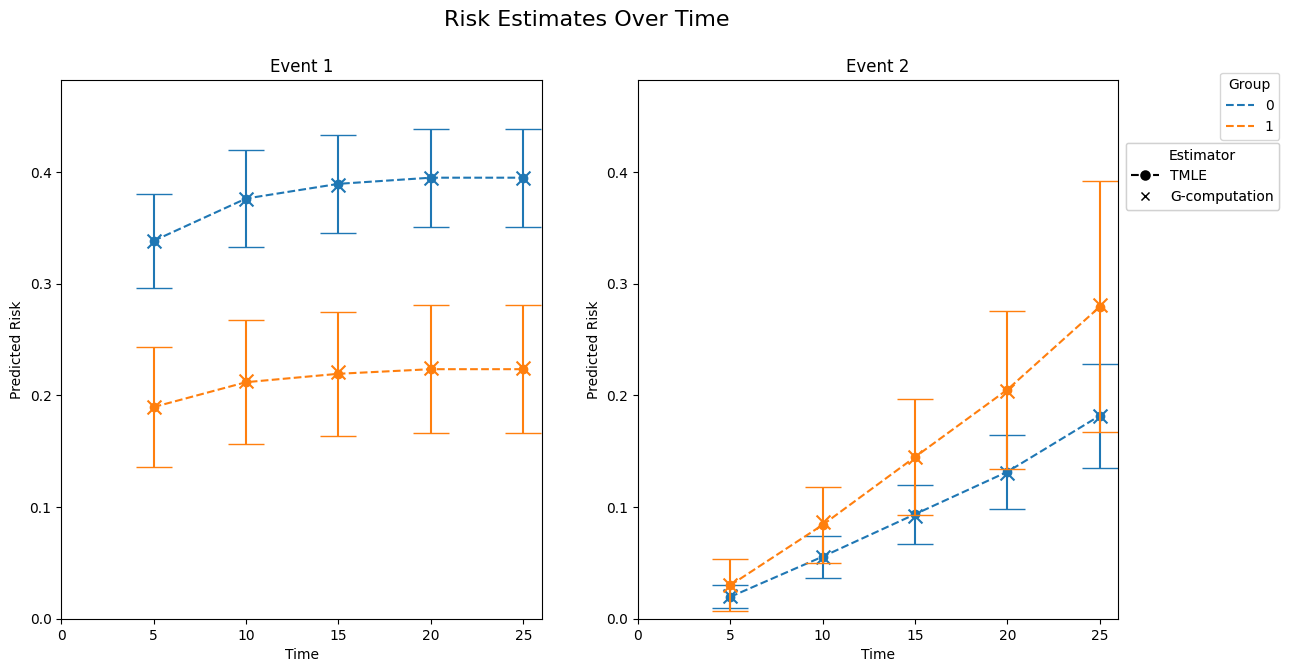

In [25]:
tmle.plot(g_comp=True, use_bootstrap=False)

Plot the ATE estimates in terms of risk ratios. You can alternatively use `type="rd"` to use risk differences instead. If `bootstrap=True` was set in the `fit` method, you can also get bootstrapped quantile-based confidence intervals when setting `use_bootstrap=True`.

(<Figure size 1400x700 with 2 Axes>,
 array([<Axes: title={'center': 'Event 1'}, xlabel='Time', ylabel='ATE (RR)'>,
        <Axes: title={'center': 'Event 2'}, xlabel='Time', ylabel='ATE (RR)'>],
       dtype=object))

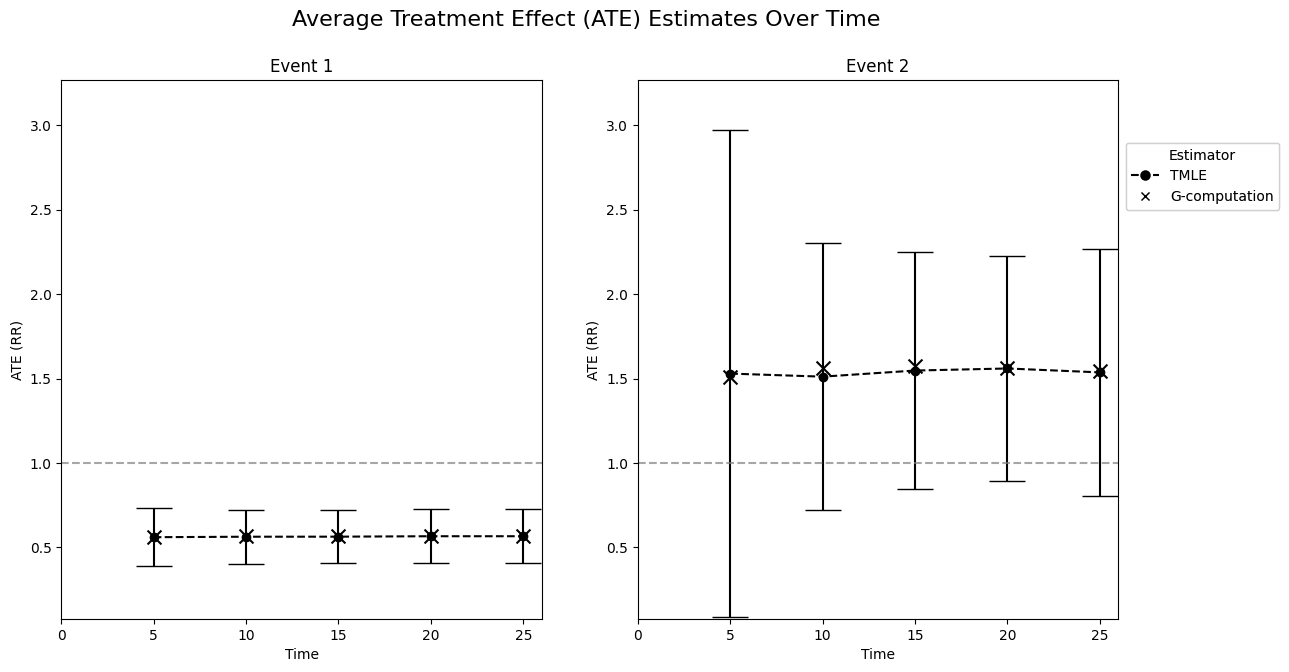

In [26]:
tmle.plot(g_comp=True, type="rr", use_bootstrap=False)

Plot $||PnEIC||$ over TMLE iterations to check that it was minimized effectively.

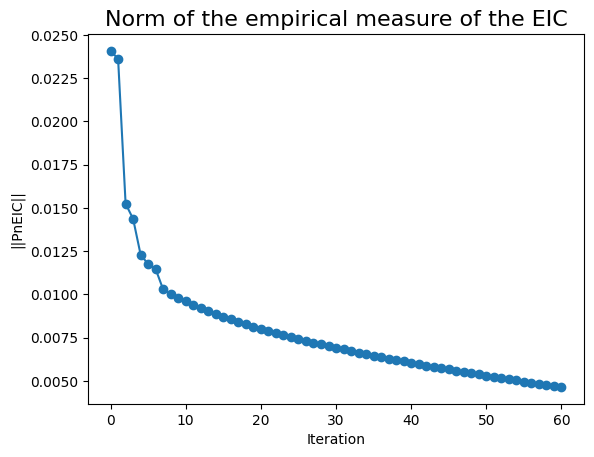

In [27]:
tmle.plot_norm_pn_eic()

Plot the nuisance weights at baseline to check that positivity is not an issue. Set `time=None` to also get plots for baseline + all target times.

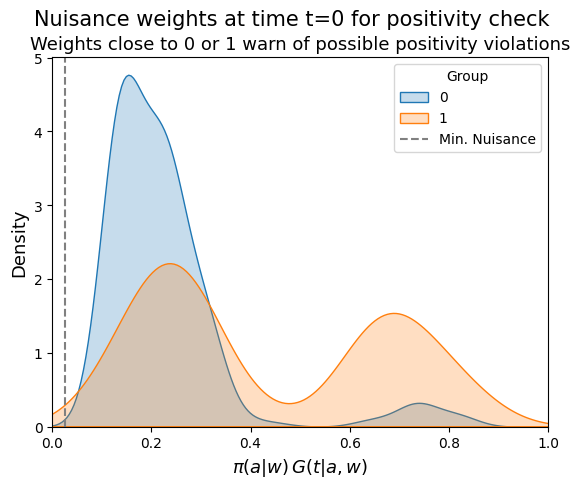

In [28]:
tmle.plot_nuisance_weights(time=0)

Since `save_models` was set to `True` in the `fit()` call, you can extract the models used for initial estimates and analyze them further. In addition, you can inspect the loss for individual risks / censoring model combinations in the state learner.

In [29]:
print(tmle.models)
print(tmle.state_learner_cv_fit)

{'propensity_model': StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression(max_iter=1000)), 'risks_model_fold_0': CauseSpecificCoxPHSurvivalAnalysis, 'censoring_model_fold_0': CoxPHSurvivalAnalysis, 'risks_model_fold_1': CauseSpecificCoxPHSurvivalAnalysis, 'censoring_model_fold_1': CoxPHSurvivalAnalysis, 'risks_model_fold_2': CauseSpecificCoxPHSurvivalAnalysis, 'censoring_model_fold_2': CoxPHSurvivalAnalysis, 'risks_model_fold_3': CauseSpecificCoxPHSurvivalAnalysis, 'censoring_model_fold_3': CoxPHSurvivalAnalysis, 'risks_model_fold_4': CauseSpecificCoxPHSurvivalAnalysis, 'censoring_model_fold_4': CoxPHSurvivalAnalysis}
             risks_model        censoring_model      loss
4  CoxPHSurvivalAnalysis  CoxPHSurvivalAnalysis  3.100491
3  CoxPHSurvivalAnalysis                DeepHit  3.106281
5  CoxPHSurvivalAnalysis   RandomSurviv

Plot the contours of the E-value for the effect estimates at a specific time for a specific event. If `evalues_benchmark` was set to `True` when initializing the `PyTMLE` class (as in this notebook), E-values for observed covariates are included. If `bootstrap=True` was set in the `fit` method, you can also get the E-values for bootstrapped confidence intervals when setting `use_bootstrap=True`.

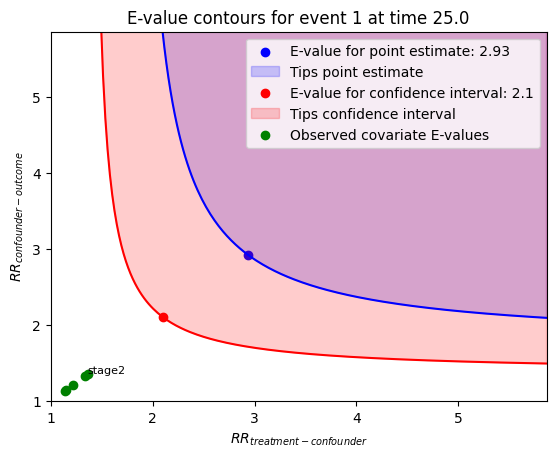

In [30]:
tmle.plot_evalue_contours(time=25.0, event=1, type="rr", use_bootstrap=False)

The E-values associated with the point estimate and CI for event 1 (relapse) at time 25 are clearly above the observed covariate E-values, which indicates that the treatment effect is rather robust. 